In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pysam
import seaborn as sns
from tqdm import tqdm
import os
from matplotlib_venn import venn3

import cmapBQ.query as cmap_query
import cmapBQ.config as cmap_config
from cmapPy.pandasGEXpress.write_gctx import write as write_gctx

## Data Import

In [2]:
DEG_sensSHY_R_Ss = pd.read_csv("/data/lvisser/DE_genes/DE_results_human_Group_R_Ss_sensSHY.csv", index_col=0)
DEG_sensSHY_R_Ss = DEG_sensSHY_R_Ss[DEG_sensSHY_R_Ss['padj'] < 0.05]
print(DEG_sensSHY_R_Ss.shape)
DEG_sensSHY_R_Ss.head()

(8170, 16)


,baseMean,log2FoldChange,lfcSE,pvalue,padj,SH-SY5Y_C2,SH-SY5Y_C1,SH-SY5Y_J2,SH-SY5Y_J4,SH-SY5Y_C4,SH-SY5Y_J3,SH-SY5Y_J1,SH-SY5Y_C3,name,type,description
ENSG00000180573,2826.190743,-2.304114,0.066354,2.939656e-265,7.644575e-261,997.190963,991.140330,4595.959023,4593.207471,882.237789,4785.644613,4837.258636,926.887119,H2AC6,protein_coding,H2A clustered histone 6 [Source:HGNC Symbol;Ac...
ENSG00000220323,1793.105477,-3.932904,0.118568,3.005440e-243,3.907823e-239,205.434664,176.785675,3202.870585,3284.405102,230.494558,3931.838593,3058.200312,254.814328,H2BC19P,transcribed_unprocessed_pseudogene,"H2B clustered histone 19, pseudogene [Source:H..."
ENSG00000261716,4040.968269,-3.512553,0.117172,3.127137e-199,2.710707e-195,679.600077,536.059787,7318.029174,7042.734431,559.772497,8330.795697,7066.052299,794.702187,H2BC20P,transcribed_unprocessed_pseudogene,"H2B clustered histone 20, pseudogene [Source:H..."
ENSG00000112936,14796.068879,2.666530,0.098941,2.814268e-161,1.829626e-157,25865.889876,28836.594900,3843.937831,3514.478782,22530.559136,4001.442345,4627.066540,25148.581622,C7,protein_coding,complement C7 [Source:HGNC Symbol;Acc:HGNC:1346]
ENSG00000158373,1881.356855,-1.918063,0.071474,1.043303e-159,5.426218e-156,838.395520,813.214103,2984.250217,2904.163572,730.088672,3122.888324,2898.189212,759.665216,H2BC5,protein_coding,H2B clustered histone 5 [Source:HGNC Symbol;Ac...


In [3]:
DEG_NB_R_S = pd.read_csv("/data/lvisser/DE_genes/DE_results_human_Group_R_S_NB.csv", index_col=0)
DEG_NB_R_S = DEG_NB_R_S[DEG_NB_R_S['padj'] < 0.05]
print(DEG_NB_R_S.shape)
DEG_NB_R_S.head()

(8362, 34)


,baseMean,log2FoldChange,lfcSE,pvalue,padj,IMR14nov_R1,SHY2sept_R1,SKN10nov_R1,SHP14nov_R1,SHP12dec_R4,...,SH-SY5Y_C1,SH-SY5Y_J2,SH-SY5Y_J4,SH-SY5Y_C4,SH-SY5Y_J3,SH-SY5Y_J1,SH-SY5Y_C3,name,type,description
ENSG00000135540,233.497948,-7.698880,0.313397,1.781157e-134,5.590695e-130,795.138444,0.000000,4.910630,419.282192,438.956284,...,5.215914,0.000000,2.496951,2.110125,0.000000,0.855965,2.976891,NHSL1,protein_coding,NHS like 1 [Source:HGNC Symbol;Acc:HGNC:21021]
ENSG00000145808,2215.649601,5.341513,0.218482,4.664153e-133,7.319922e-129,73.794751,1479.210118,3431.302656,40.234150,68.095844,...,3685.565181,4828.227809,5333.488302,3803.500357,4682.154858,4953.470365,3873.678819,ADAMTS19,protein_coding,ADAM metallopeptidase with thrombospondin type...
ENSG00000116983,419.907743,7.715693,0.317429,9.996643e-132,1.045915e-127,0.000000,863.720351,848.311319,1.058793,0.000000,...,502.814157,475.948795,429.475650,687.900758,438.116923,463.933115,637.798799,HPCAL4,protein_coding,hippocalcin like 4 [Source:HGNC Symbol;Acc:HGN...
ENSG00000112038,1007.654963,9.419500,0.397937,6.689737e-126,5.249437e-122,9.224344,2299.184915,1002.996161,0.000000,0.000000,...,1193.401236,585.783133,563.062553,1564.657706,658.933479,572.640690,1993.772441,OPRM1,protein_coding,opioid receptor mu 1 [Source:HGNC Symbol;Acc:H...
ENSG00000112936,7314.561892,11.833568,0.564453,1.963517e-103,1.232617e-99,2.767303,14336.333550,1928.649901,6.352760,6.285770,...,26374.793225,3494.525141,3184.861578,20935.605433,3638.550501,4183.101724,23504.039282,C7,protein_coding,complement C7 [Source:HGNC Symbol;Acc:HGNC:1346]


In [4]:
whitelist = pd.read_csv("/data/lvisser/ferroptosis_gene_whitelists/complete_gene_list_no_duplicates.txt", index_col = 0)
whitelist.columns = ["gene_symbol"]
print(whitelist.shape)
whitelist.head()

(1271, 1)


,gene_symbol
1,NR4A1
2,NR4A2
3,NR4A3
4,ACACA
5,ACLY


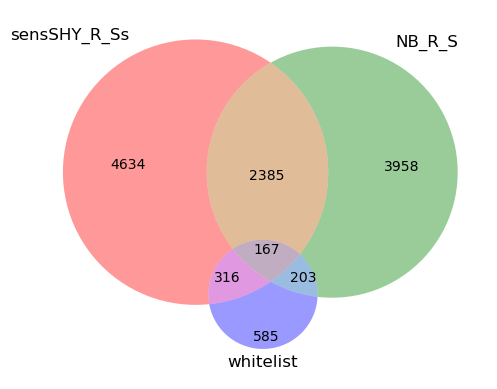

In [5]:
# Assuming gene_symbols_1, gene_symbols_2, and gene_symbols_3 are your three datasets
gene_symbols_1 = set(DEG_sensSHY_R_Ss['name'])
gene_symbols_2 = set(DEG_NB_R_S['name'])
gene_symbols_3 = set(whitelist['gene_symbol'])

venn3([gene_symbols_1, gene_symbols_2, gene_symbols_3], ('sensSHY_R_Ss', 'NB_R_S', 'whitelist'))

plt.show()

In [6]:
# Genes unique to sensSHY_R_Ss
unique_to_sensSHY_R_Ss = gene_symbols_1 - gene_symbols_2

# Genes that overlap with NB_R_S
overlap_with_NB_R_S = gene_symbols_1 & gene_symbols_2

In [14]:
# Set up credentials
cmap_config.setup_credentials('/data/lvisser/CMap/cmap-419518-20d7c4aee1d2.json')
bq_client = cmap_config.get_bq_client()